## Домашнее задание к лекции "Статистика. Практика"  

#### Задание 1
Вернемся к набору данных о видеоиграх.  

Ответьте на следующие вопросы:  

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:  

сформулируйте нулевую и альтернативную гипотезы;  
выберите пороговый уровень статистической значимости;  
опишите полученные результаты статистического теста.  

#### Задание 2
Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь) по признаку спама. Для этого:  

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

from sklearn.feature_extraction.text import TfidfVectorizer  

tfidf = TfidfVectorizer()  
tfidf_matrix = tfidf.fit_transform(df.Message)  
names = tfidf.get_feature_names()  
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)  
Можете поэкспериментировать с параметрами TfidfVectorizer;  
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;  
7) Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;  
8) Опишите результаты при помощи confusion_matrix;  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).  


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer as wnl
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


#### Задание 1


In [2]:
df = pd.read_csv('vgsales.csv')
df.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


**Как критики относятся к спортивным играм?**  
H0: Оценки критиков одинаковы для спортивных и неспортивных игр  
H1: Критики по-разному оценивают спортивные игры и игры других жанров

In [3]:
df_sport = df.loc[df.Genre == 'Sports', ['Critic_Score']].dropna()
df_nonsport = df.loc[df.Genre != 'Sports', ['Critic_Score']].dropna()


(array([  4.,   3.,   4.,   7.,  14.,  17.,  24.,  29.,  36.,  55.,  69.,
         84., 119., 112., 158., 187., 125., 107.,  35.,   5.]),
 array([19.  , 22.95, 26.9 , 30.85, 34.8 , 38.75, 42.7 , 46.65, 50.6 ,
        54.55, 58.5 , 62.45, 66.4 , 70.35, 74.3 , 78.25, 82.2 , 86.15,
        90.1 , 94.05, 98.  ]),
 <BarContainer object of 20 artists>)

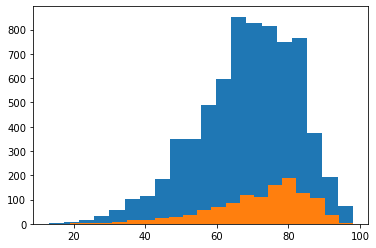

In [4]:
plt.hist(df_nonsport['Critic_Score'], bins=20)
plt.hist(df_sport['Critic_Score'], bins=20)


In [5]:
alpha = 0.05
result1 = st.ttest_ind(df_sport['Critic_Score'], df_nonsport['Critic_Score'], equal_var=False)
print(result1)

if (result1.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, критики по-разному относятся к спортивным играм и играм других жанров')
    if df_sport['Critic_Score'].mean() > df_nonsport['Critic_Score'].mean():
        print('Оценки спортивных игр выше, чем оценки остальных игр')
    else:
        print('Оценки спортивных игр ниже, чем оценки остальных игр')
else:
    print('Не отвергаем нулевую гипотезу')


Ttest_indResult(statistic=8.08698828481822, pvalue=1.181171308320441e-15)
Отвергаем нулевую гипотезу, критики по-разному относятся к спортивным играм и играм других жанров
Оценки спортивных игр выше, чем оценки остальных игр


**Критикам нравятся больше игры на PC или на PS4?**  
H0: Критики оценивают игры на PC и PS4 одинаково  
H1: Критики по-разному оценивают игры на PC и PS4  


In [6]:
df_PC = df.loc[df.Platform == 'PC', ['Critic_Score']].dropna()
df_PS4 = df.loc[df.Platform == 'PS4', ['Critic_Score']].dropna()


(array([ 1.,  1.,  0.,  2.,  1.,  2.,  4.,  5.,  7.,  3., 16., 16., 27.,
        42., 29., 41., 30., 17.,  7.,  1.]),
 array([19. , 22.9, 26.8, 30.7, 34.6, 38.5, 42.4, 46.3, 50.2, 54.1, 58. ,
        61.9, 65.8, 69.7, 73.6, 77.5, 81.4, 85.3, 89.2, 93.1, 97. ]),
 <BarContainer object of 20 artists>)

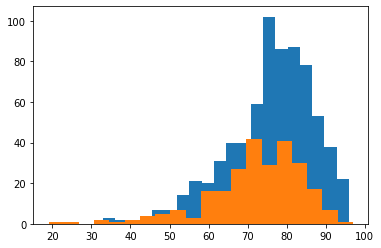

In [7]:
plt.hist(df_PC['Critic_Score'], bins=20)
plt.hist(df_PS4['Critic_Score'], bins=20)


In [8]:
alpha = 0.05
result2 = st.ttest_ind(df_PC['Critic_Score'], df_PS4['Critic_Score'], equal_var=False)
print(result2)

if (result2.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, критики по-разному оценивают игры на PC и PS4')
    if df_PC['Critic_Score'].mean() > df_PS4['Critic_Score'].mean():
        print('Игры на PC оцениваются выше')
    else:
        print('Игры на PS4 оцениваются выше')
else:
    print('Не отвергаем нулевую гипотезу')


Ttest_indResult(statistic=4.3087588262138725, pvalue=2.067249157283479e-05)
Отвергаем нулевую гипотезу, критики по-разному оценивают игры на PC и PS4
Игры на PC оцениваются выше


**Критикам больше нравятся стрелялки или стратегии?**  
H0: Критики оценивают стрелялки и стратегии одинаково  
H1: Критики по-разному оценивают стрелялки и стратегии  


In [9]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [10]:
df_Strategy = df.loc[df.Genre == 'Strategy', ['Critic_Score']].dropna()
df_Shooter = df.loc[df.Genre == 'Shooter', ['Critic_Score']].dropna()


(array([ 1.,  2.,  2.,  4.,  7.,  6.,  5., 10., 16., 21., 20., 33., 25.,
        33., 32., 29., 13., 21., 14.,  8.]),
 array([35.  , 37.95, 40.9 , 43.85, 46.8 , 49.75, 52.7 , 55.65, 58.6 ,
        61.55, 64.5 , 67.45, 70.4 , 73.35, 76.3 , 79.25, 82.2 , 85.15,
        88.1 , 91.05, 94.  ]),
 <BarContainer object of 20 artists>)

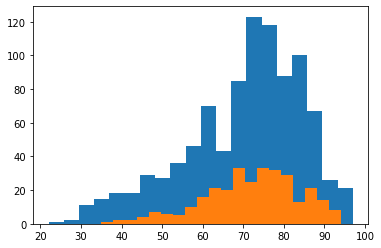

In [11]:
plt.hist(df_Shooter['Critic_Score'], bins=20)
plt.hist(df_Strategy['Critic_Score'], bins=20)


In [12]:
alpha = 0.05
result3 = st.ttest_ind(df_Shooter['Critic_Score'], df_Strategy['Critic_Score'], equal_var=False)
print(result3)

if (result3.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, критики по-разному оценивают игры на PC и PS4')
    if df_Shooter['Critic_Score'].mean() > df_Strategy['Critic_Score'].mean():
        print('Стрелялки оцениваются выше')
    else:
        print('Стратегии оцениваются выше')
else:
    print('Не отвергаем нулевую гипотезу')


Ttest_indResult(statistic=-2.2972408230640315, pvalue=0.021938989522304823)
Отвергаем нулевую гипотезу, критики по-разному оценивают игры на PC и PS4
Стратегии оцениваются выше


#### Задание 2

In [13]:
spam = pd.read_csv('spam.csv')
spam.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Задание 2


In [14]:
# Приведем текст к нижнему регистру
Message_lower = spam.Message.str.lower()


In [15]:
# Удалим ненужные символы
Message_clean = [re.sub('[\W_]+',' ', msg) for msg in Message_lower]


In [16]:
# Удалим стоп-слова
Message_list = [msg.split() for msg in Message_clean]


In [17]:
stopwords_set = set(stopwords.words('english'))
Message_wosw = [[word for word in msg if word not in stopwords_set] for msg in Message_list]


In [18]:
# Приведем слова к нормальной форме

wordnet_lemmatizer = wnl()
Message_lemmatized = [[wordnet_lemmatizer.lemmatize(word) for word in msg] for msg in Message_wosw]


In [19]:
mll = pd.DataFrame([' '.join(msg) for msg in Message_lemmatized])
mll.columns = ['Message_lemmatized_list']
mll


,Message_lemmatized_list
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
2,free entry 2 wkly comp win fa cup final tkts 2...
3,u dun say early hor u c already say
4,nah think go usf life around though
...,...
5567,2nd time tried 2 contact u u 750 pound prize 2...
5568,ü b going esplanade fr home
5569,pity mood suggestion
5570,guy bitching acted like interested buying some...


In [20]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(mll['Message_lemmatized_list'])
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)


In [21]:
# Делим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, spam.Category, test_size=0.3, random_state=42)


In [22]:
# Обучаем модель логистической регрессии
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [23]:
# Делаем прогноз на тестовых данных
prediction = lr.predict(X_test)
prediction


array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [24]:
# Сравним результаты, полученные на тестовой выборке, и фактические значения
results = spam[spam.index.isin(y_test.index)][['Category', 'Message']].reset_index()
results = pd.concat([results, pd.Series(prediction)], axis=1)
results.columns = ['Initial_index', 'Category_fact', 'Message', 'Category_predicted']


In [25]:
# Строим confusion_matrix
cm = confusion_matrix(results.Category_fact, results.Category_predicted)
cm
# 1312 случаев (78%): корректно определены как ham
# 136 случаев (8%): ложно определены как ham
# 199 случаев (12%): ложно определены как spam
# 25 случаев (1%): корректно определены как spam

array([[1312,  136],
       [ 199,   25]], dtype=int64)

In [26]:
accuracy_score(results.Category_fact, results.Category_predicted)


0.7996411483253588

In [27]:
# Выводим ошибочные результаты и текст соответствующего сообщения
false_results = results[results.Category_fact != results.Category_predicted]\
[['Initial_index', 'Category_fact','Category_predicted', 'Message']]
false_results


,Initial_index,Category_fact,Category_predicted,Message
0,8,spam,ham,WINNER!! As a valued network customer you have...
1,12,spam,ham,URGENT! You have won a 1 week FREE membership ...
2,15,spam,ham,"XXXMobileMovieClub: To use your credit, click ..."
4,19,spam,ham,England v Macedonia - dont miss the goals/team...
14,47,ham,spam,"Fair enough, anything going on?"
...,...,...,...,...
1633,5446,ham,spam,I am back. Good journey! Let me know if you ne...
1634,5450,ham,spam,Sac needs to carry on:)
1638,5457,ham,spam,Arun can u transfr me d amt
1657,5524,spam,ham,You are awarded a SiPix Digital Camera! call 0...
